##  Forward modelling DC on a homogenous earth
Define the geophysical data $d$ using the following relation
$$ \mathbf{d} = f(\mathbf{m}) + \epsilon, $$
where $f$ is the forward operator, $m$ is a model, and $\epsilon$ is a noise distribution. 

### DC scenario
Consider the case of a dipole-dipole DC survey collected over a homogenous and isotropic half space of 100 $\Omega \cdot \mathrm{m}$. Your task is to calculate the measured resistance $V/I$ which would be observed in such a survey.

### These two lines of code simply import some Python libraries that will be used. 

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time 
from IPython import display 

### Survey configuration
Electrodes are spaced 1 metre apart from 0 to 11 metres in a straight line.

In [29]:
# Electrode locations 
NE = 12    # number of electrodes, must be even 
RHOA = 100 # half-space resistivity, same as \rho_a
# locations of electrodes 
Ex = np.linspace(0, 11, NE)  

## Task:
Remember $\rho_a = RK$ where $R$ is measured resistance $dV/I$ (differential voltage measurement across AB divided by current...our current normalized data) and $K$ is the gemetric factor. The geometric factor is 
	$$
		K =2\pi \left\{ \left[ \frac{1}{AM}  -  \frac{1}{MB} \right]  -  
					\left[ \frac{1}{AN}  -  \frac{1}{NB} \right]  
		  	    \right\}^{-1}
	$$
Your task, should you choose to accept it, is to calculate the geometric factor and forward model a half-space resistivity at each point in the dipole-dipole survey. 

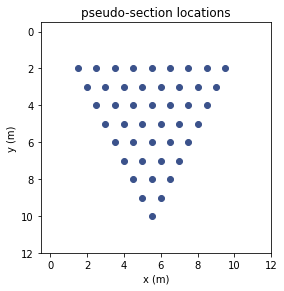

In [65]:
# Set up lists to fill with data
KK,SS,XX,IA,IB,IM,IN,RR,PP = [],[],[],[],[],[],[],[],[]


fig = plt.figure()
ax = fig.add_axes([.1,.1,.8,.8])
ax.set_ylim(-.5,12)
ax.set_xlim(-.5,12)
ax.invert_yaxis() 
ax.set_aspect('equal')
ax.set_title('pseudo-section locations')
cmap = plt.cm.get_cmap("viridis")

# Loop over AB pairs 
for iA, A in enumerate (Ex[0:-1]):
    iB = iA+1 
    B = Ex[iB] 
    # loop over MN pairs
    for iM in range(iB+1, NE-1, 1):
        iN = iM + 1
        M = Ex[iM]
        N = Ex[iN]
        AB = (A+B)/2
        MN = (M+N)/2
        ABMN = np.average([AB,MN])                           # location of point
        S = np.sqrt( ((A+B)/2 - (M+N)/2)**2 )                # separation
        XX.append(ABMN)
        SS.append(S)
        IA.append(iA)
        IB.append(iB)
        IM.append(iM)
        IN.append(iN)
        PP.append(RHOA)                                       # apparent resistivity for halfspace is trivial
        
        ##########################################################################
        # TODO calculate geometric factor and recorded resistivity at each point  #
        ##########################################################################
        K = np.random.normal()                               # geometric factor
        R = np.random.normal()                               # resistivity
        pi = np.pi
      
        
        ##########################################################################
        # END TODO                                                                  #
        ##########################################################################
        KK.append(K)
        RR.append(R)
        
        # plot up pseudo section locations
        ax.plot(ABMN, S, 'o', color=cmap(.25)) #cmap(np.abs(K)/np.max(np.abs(KK))))
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        pab, = ax.plot([A,B], [0,0], '-x', color='black')
        pmn, = ax.plot([M,N], [0,0], '-x', color='red')
        display.display(fig)
        display.clear_output(wait=True)
        time.sleep(0.25)
        pab.remove()
        pmn.remove()   
        
# add 2% Gaussian noise
RN = RR + np.random.normal(0, .02 * np.max(np.abs(RR)), len(RR))
PaN = RN*KK

### Save your results
Write out your results to a file called "Forward.dat" with the same format as ResIPy 

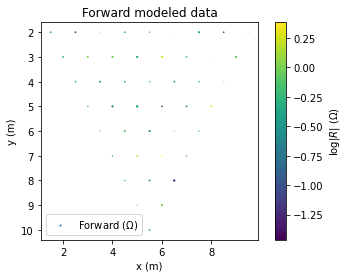

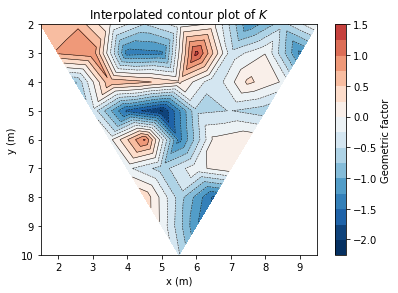

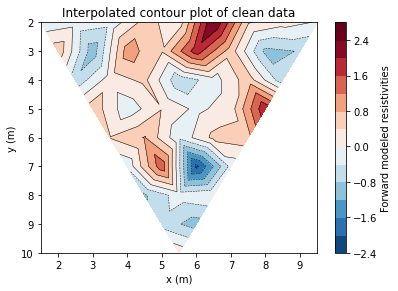

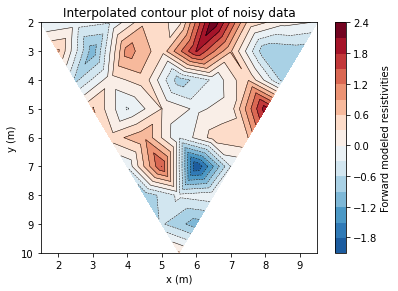

In [66]:
######################
# plots of the above #
######################

plt.figure()
plt.gca().invert_yaxis() 
plt.gca().set_aspect('equal')
# in scatter size is s, colour is c
plt.scatter(XX, SS, s=np.abs(KK), c=np.log10(np.abs(RR)), label='Forward $(\Omega)$')
cb = plt.colorbar()
cb.set_label(r"$\log |R|$ ($\Omega$)")
plt.gca().set_title("Forward modeled data")
plt.gca().set_xlabel("x (m)")
plt.gca().set_ylabel("y (m)")
plt.legend()

# countour plot of geometric factor
fig2 = plt.figure()
ax2 = fig2.add_axes([.1,.1,.8,.8])
plt.gca().invert_yaxis() 
ax2.set_title("Interpolated contour plot of $K$")
ax2.tricontour(XX, SS, KK, levels=14, linewidths=0.5, colors='k')
KKmax = np.max(np.abs(KK))
cntr2 = ax2.tricontourf(XX, SS, KK, vmin=-KKmax, vmax=KKmax, levels=14, cmap="RdBu_r")
cb = plt.colorbar(cntr2, ax=ax2)
cb.set_label('Geometric factor')
plt.gca().set_xlabel("x (m)")
plt.gca().set_ylabel("y (m)")

# contour plot of predicted resistivity 
fig2 = plt.figure()
ax2 = fig2.add_axes([.1,.1,.8,.8])
plt.gca().invert_yaxis() 
ax2.set_title("Interpolated contour plot of clean data")
RRmax = np.max(np.abs(RR))
ax2.tricontour(XX, SS, RR, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(XX, SS, RR, levels=14, vmin=-RRmax, vmax=RRmax, cmap="RdBu_r")
plt.gca().set_xlabel("x (m)")
plt.gca().set_ylabel("y (m)")
cb = plt.colorbar(cntr2, ax=ax2)
cb.set_label('Forward modeled resistivities')

# contour plot of predicted resistivity with noise
fig2 = plt.figure()
ax2 = fig2.add_axes([.1,.1,.8,.8])
plt.gca().invert_yaxis() 
ax2.set_title("Interpolated contour plot of noisy data")
RNmax = np.max(np.abs(RN))
ax2.tricontour(XX, SS, RN, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(XX, SS, RN, levels=14, vmin=-RNmax, vmax=RNmax, cmap="RdBu_r")
plt.gca().set_xlabel("x (m)")
plt.gca().set_ylabel("y (m)")
cb = plt.colorbar(cntr2, ax=ax2)
cb.set_label('Forward modeled resistivities')

In [67]:
ff = open('ForwardClean.dat', 'w')
ff.write("          " + str(len(KK)) + "\r\n" )
for dat in range(len(KK)):
    ff.write(str(dat+1).rjust(5) + str(IA[dat]+1).rjust(7) + str(IB[dat]+1).rjust(7) \
                                 + str(IM[dat]+1).rjust(7) + str(IN[dat]+1).rjust(7) \
                                 + format(RR[dat], ' >20.10E') \
                                 + format(PP[dat], ' >15.5F' )+  "\r\n" )
ff.close()    
    
ff = open('ForwardNoise.dat', 'w')
ff.write("          " + str(len(KK)) + "\r\n" )
for dat in range(len(KK)):
    ff.write(str(dat+1).rjust(5) + str(IA[dat]+1).rjust(7) + str(IB[dat]+1).rjust(7) \
                                 + str(IM[dat]+1).rjust(7) + str(IN[dat]+1).rjust(7) \
                                 + format(RN[dat], ' >20.10E') \
                                 + format(PaN[dat], ' >15.5F' )+  "\r\n" )
ff.close()